## General instructions

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel/runtime** (Colab: in the menubar, select *Runtime*$\rightarrow$*Factory Reset Runtime*; Jupyter: in the menubar, select *Kernel*$\rightarrow$*Restart*) and then **run all cells** (Colab: in the menubar, select *Runtime*$\rightarrow$*Run all*; Jupyter: in the menubar, select *Cell*$\rightarrow$*Run All*).

Make sure you fill in any place that says `YOUR CODE HERE` or `"YOUR ANSWER HERE"`, as well as the list of the group members in the following cell.

Enter here the *Group Name* and the list of *Group Members*.

`Doi eletronics`

`Burco Lorenzo, Persello Riccardo`

In order to be able to have an evaluation DO NOT delete/cut the cells with code and answers. Once you have finished you can downolad the notebook (Colab: in the menubar, select *File*$\rightarrow$*Download .ipynb*; Jupyter: in the menubar, select *File*$\rightarrow$*Download as*$\rightarrow$*Notebook (.ipynb)*) and upload as an assignment on the e-learning platform.

The following cell will load the Google Drive extension for the current notebook, when the variable `MOUNT` is `True`. This allow you to mount the Google Drive filesystem for file persistence. The mountpoint will be `/content/gdrive`.
Furthermore, it will set the `PATH` variable, from now on, so that if you have to refer to external files you could do that by writing:

```python
os.path.join(PATH, filename)
```

This will append the filename after the specific PATH.

In [69]:
import os
MOUNT = False
if 'google.colab' in str(get_ipython()) and MOUNT:
    from google.colab import drive
    drive.mount('/content/gdrive')
    PATH = '/content/gdrive/MyDrive'
else:
    PATH = '.'

# Important warning

**⚠️ avoid copying, removing or modifying test cells, if you do that your assignment might be graded wrongly ⚠️**

---

# Load the preprocessed file

Load the saved `tfidf_matrix` from the file created using the `joblib.load(filename)` function.

In [70]:
import joblib

matrix = joblib.load('tf_idf_matrix.joblib')

The `sklearn.cluster.AgglomerativeClustering` class performs a hierarchical clustering (agglomerative, i.e., bottom-up). The relevant parameters for constructing a clustering model are:

* `n_clusters` the number of clusters (that is, where to cut the *dendrogram*)
* `affinity` the *similarity* measure to be used ('euclidean', 'manhattan', 'cosine', 'precomputed)
* `linkage` the type of linkage to use to decide agglomeration ('ward', 'complete' $\rightarrow$ maximum, 'average', 'single' $\rightarrow$ minimum)

Try to create an agglomerative clustering model with 5 clusters using the `cosine` similarity and fit the model. Use the `fit_predict()` function that automatically returns the clustering.

In [71]:
import sklearn.cluster
import numpy as np
import pandas as pd

X = matrix.toarray()
non_zero_rows = [row.any() for row in X]

df = pd.read_csv('movie_data.csv')
df = df[non_zero_rows]

X = X[non_zero_rows]

clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=5, metric='cosine', linkage='complete')
fit_prediction = clustering.fit_predict(X)

Compute the silhouette score of the given clustering. To do that, you can use the `sklearn.metrics.silhouette_score()` function. Notice that you have to specify the `metric` parameter in order to be consistent with the affinity measure used in the clustering model.

In [72]:
import sklearn.metrics
score = sklearn.metrics.silhouette_score(X, fit_prediction, metric='cosine')
score

0.03082796188775339

Try to apply the **elbow** method to select the best value of the number of clusters for the `AgglomerativeClustering` (leaving all the other parameters unchanged). In particular, try to get the silhouette score for all the values in the range $[2, 10]$.

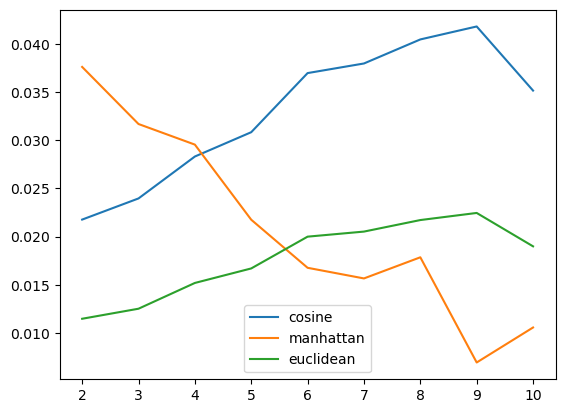

In [73]:
import matplotlib.pyplot as plt

def score_with_n_clusters(n: int, metric: str) -> float:
    clustering = sklearn.cluster.AgglomerativeClustering(n, metric=metric, linkage='complete')
    fit_prediction = clustering.fit_predict(X)

    score = sklearn.metrics.silhouette_score(X, fit_prediction, metric=metric)
    return score

n_range = range(2, 11)

metrics = ['cosine', 'manhattan', 'euclidean']

for metric in metrics:
    scores = [score_with_n_clusters(n, metric) for n in n_range]
    plt.plot(n_range, scores)
    plt.legend(metrics)

“Open the clusters” and look at those movies that are finishing in the same cluster, can you spot some similarities? Briefly report your considerations.

In [74]:
clustering = sklearn.cluster.AgglomerativeClustering(9, metric='cosine', linkage='complete')
fit_prediction = clustering.fit_predict(X)

list(zip(clustering.labels_, df['Title'], df['Genre']))

[(4, 'The Godfather', 'Crime, Drama'),
 (0, 'The Shawshank Redemption', 'Drama'),
 (3, "Schindler's List", 'Biography, Drama, History'),
 (8, 'Raging Bull', 'Biography, Drama, Sport'),
 (0, 'Casablanca', 'Drama, Romance, War'),
 (0, 'Citizen Kane', 'Drama, Mystery'),
 (3, 'Gone with the Wind', 'Drama, Romance, War'),
 (4, 'The Wizard of Oz', 'Adventure, Family, Fantasy'),
 (4, "One Flew Over the Cuckoo's Nest", 'Drama'),
 (3, 'Lawrence of Arabia', 'Adventure, Biography, Drama'),
 (4, 'Vertigo', 'Mystery, Romance, Thriller'),
 (4, 'Psycho', 'Horror, Mystery, Thriller'),
 (4, 'The Godfather Part II', 'Crime, Drama'),
 (0, 'On the Waterfront', 'Crime, Drama, Thriller'),
 (5, 'Sunset Blvd.', 'Drama, Film-Noir'),
 (4, 'Forrest Gump', 'Drama, Romance'),
 (7, 'The Sound of Music', 'Biography, Drama, Family'),
 (0, '12 Angry Men', 'Crime, Drama'),
 (0, 'West Side Story', 'Crime, Drama, Musical'),
 (7, 'Star Wars: Episode IV - A New Hope', 'Action, Adventure, Fantasy'),
 (0, '2001: A Space Odys

Given the high dimensionality of the data, it is not possible to plot the data points on a 2D plane. A possible way to overcome this problem is to get a projection of the data using the so-called *Principal Component Analysis*, which is a dimensionality reduction (or deconmposition) technique that tries to summarize the data in a smaller number of meaningful dimensions, which however try to capture the variability of the original data. 

You can refer to the [sklearn implementation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) of PCA for some detail. In particulawr, try to decompose your data to just 2 dimensions (i.e., components) and plot them by assigning a different color to each different cluster.

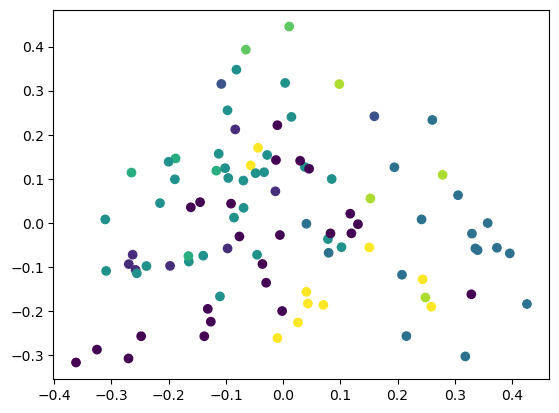

In [75]:
pca = sklearn.decomposition.PCA(n_components=2)
twod = pca.fit_transform(X)

plt.scatter(twod[:, 0], twod[:, 1], c=clustering.labels_, cmap='viridis')

Perform the same kind of analysis (i.e., all the steps including also the decision on the number of clusters if applicable) using the `dbscan` and the `kmeans` algorithms. Are there differences in the clusters? Can you visually emphasize them (i.e., by plotting).

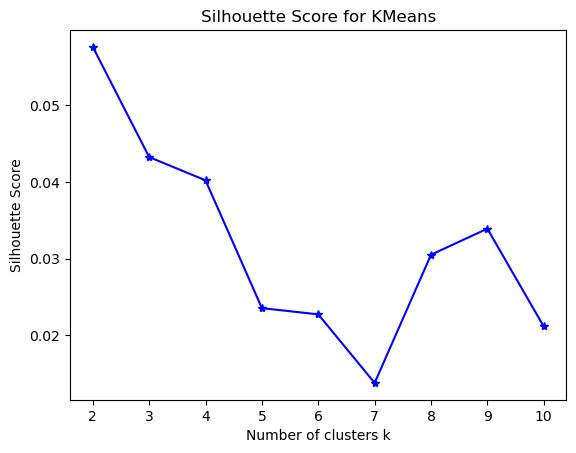

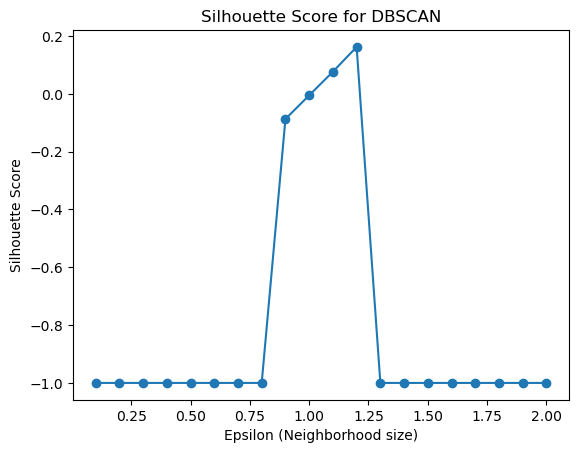

In [76]:
from sklearn.cluster import KMeans, DBSCAN

# KMeans

scores = []
K = range(2,11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=123, n_init='auto')
    kmeans = kmeans.fit_predict(X)
    scores.append(sklearn.metrics.silhouette_score(X, kmeans, metric='cosine'))
plt.plot(K, scores, 'b*-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for KMeans')
plt.show()

# DBSCAN

scores = []
eps_values = np.linspace(0.1, 2.0, 20)

for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    labels = dbscan.fit_predict(X)
    
    if len(set(labels)) > 1:
        scores.append(sklearn.metrics.silhouette_score(X, labels, metric='cosine'))
    else:
        scores.append(-1)

# Plot the silhouette scores
plt.plot(eps_values, scores, marker='o')
plt.title('Silhouette Score for DBSCAN')
plt.xlabel('Epsilon (Neighborhood size)')
plt.ylabel('Silhouette Score')
plt.show()
